# MAT555E - Spring 2022 - Homework 2 

Cem Sanga - 509201104 - sanga@itu.edu.tr

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

***
# Question 1

For this question we are going to use the following dataset:

In [2]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
prices['data'].head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


Write a regression model, and analyze it. Pick the smallest model and make sure that all variables you picked produce significant regression coefficients with resonable ANOVA profile.

# Solution 1

This dataset comes with a built-in description. Let's call it.

In [3]:
print(copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



> 'Outcome variable is the world consumption of copper for 25 years.'

In [4]:
df1 = pd.DataFrame(prices['data'])
df1.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


(   COPPERPRICE  INCOMEINDEX  ALUMPRICE  INVENTORYINDEX  TIME
 0        26.56         0.70      19.76            0.98   1.0
 1        27.31         0.71      20.78            1.04   2.0
 2        32.95         0.72      22.55            1.05   3.0
 3        33.90         0.70      23.06            0.97   4.0
 4        42.70         0.74      24.93            1.02   5.0,
 <AxesSubplot:>)

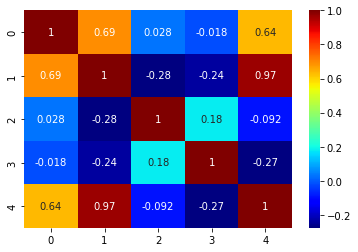

In [5]:
X1 = df1.iloc[:,1:6]
cor1 = np.corrcoef(X1.transpose())
X1.head(),sns.heatmap(cor1, cmap = "jet", annot = True)

With this matrix, we can choose which predictors can be used together meaningfully. For every predictor we check the diagonal element (of course every element correlates with itself on the diagonal). It might be okay to work with **blue** and **light blue** colors for each diagonal element, since diagonals do not have significant linear dependence to these colors in the map. With this colormap in mind, I will construct the model using all of the predictors and make decisions aiming high $R^2$ and Adj. $R^2$ values.

In [6]:
m1 = ols('WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX + TIME', df1).fit()
at1 = anova_lm(m1)
print(m1.summary(),"\n\n ANOVA:\n\n",at1) #  m1 : MODEL 1, at: ANOVA Table

                            OLS Regression Results                            
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.11e-15
Time:                        23:23:48   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.

***
I will compare the $P > |t|$ values. Lower p value is better. From source [Understanding the Regression Summary](https://rc2e.com/linearregressionandanova#recipe-id240), we can quote;

> "The p-value is a probability. It gauges the likelihood that the coefficient is not significant, so smaller is better. Big is bad because it indicates a high likelihood of insignificance. Variables with large p-values are candidates for elimination."

So I will be removing the high p values coefficients from the model. I will start with **intercept**. By adding a `-1` at the end of the model building string we can remove the intercept parameter.

In [7]:
m1 = ols('WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX + TIME - 1', df1).fit()
at1 = anova_lm(m1) 
print(m1.summary(),"\n\n ANOVA:\n\n",at1)

                                 OLS Regression Results                                
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2209.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.05e-26
Time:                        23:23:48   Log-Likelihood:                         -172.62
No. Observations:                  25   AIC:                                      355.2
Df Residuals:                      20   BIC:                                      361.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

***
$R^2$ is better now. But I will try to reduce it further by eliminating more parameters. Next one will be, `INCOMEINDEX` due to it's highest p value.

In [8]:
m1 = ols('WORLDCONSUMPTION ~ COPPERPRICE + ALUMPRICE + INVENTORYINDEX + TIME - 1', df1).fit()
at1 = anova_lm(m1)
print(m1.summary(),"\n\n ANOVA:\n\n",at1)

                                 OLS Regression Results                                
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2796.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    2.66e-28
Time:                        23:23:48   Log-Likelihood:                         -173.07
No. Observations:                  25   AIC:                                      354.1
Df Residuals:                      21   BIC:                                      359.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

***
Next victim is will be `COPPERPRICE`. $R^2$ value did not improve but since we are looking for the smallest model possible, I keep taking down parameters by looking the highest p values and `F` value in ANOVA table. Smaller F values indicates the model remains significant.

In [9]:
m1 = ols('WORLDCONSUMPTION ~ ALUMPRICE + INVENTORYINDEX + TIME - 1', df1).fit()
at1 = anova_lm(m1)
print(m1.summary(),"\n\n ANOVA:\n\n",at1)

                                 OLS Regression Results                                
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3367.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.97e-29
Time:                        23:23:48   Log-Likelihood:                         -174.92
No. Observations:                  25   AIC:                                      355.8
Df Residuals:                      22   BIC:                                      359.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

***
If I further reduce the model by removing the `ALUMPRICE` predictor, $R^2$ value slightly decreases. So I will keep this model for the problem. Then, my surviving predictors are `ALUMPRICE`,`INVENTORYINDEX` and `TIME`. These remaining predictors do not violate the intuition taken from the correlation heatmap.

(   COPPERPRICE  INCOMEINDEX  ALUMPRICE  INVENTORYINDEX  TIME
 0        26.56         0.70      19.76            0.98   1.0
 1        27.31         0.71      20.78            1.04   2.0
 2        32.95         0.72      22.55            1.05   3.0
 3        33.90         0.70      23.06            0.97   4.0
 4        42.70         0.74      24.93            1.02   5.0,
 <AxesSubplot:>)

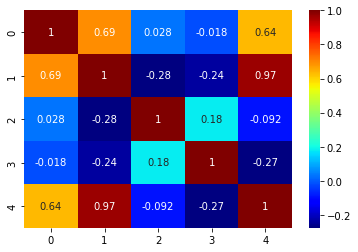

In [10]:
X1.head(),sns.heatmap(cor1, cmap = "jet", annot = True)

If we check the elements $(2,2),(2,3)$ and $(2,4)$; we see that diagonal element $(2,2)$ has relatively no correlation with the other two terms. Finally, we can use our final model for prediction. I will reduce the predictor dataframe to contain only the surviving ones and store them in `Xnew`.

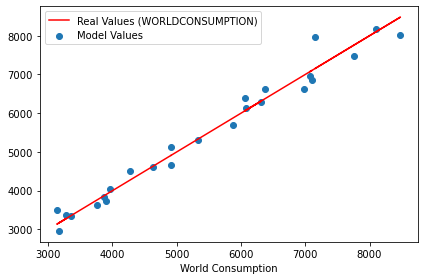

In [11]:
X1new = X1.iloc[:,2:5]
pred = m1.predict(X1new)
yreal = df1["WORLDCONSUMPTION"]
plt.plot(yreal,yreal, c="red",label="Real Values (WORLDCONSUMPTION)")
plt.scatter(yreal,pred,label = "Model Values")
plt.legend()
plt.xlabel("World Consumption")
#plt.ylabel("World \n Consumption\n & Model Values", rotation=0)
plt.tight_layout()
plt.show()

Eyeballing the model; it seems fine for the first $\%75$ percent of data, but the deviation from the real values of the ones after $7000$ might be problematic for forecasting uses of the model. 

***
# Question 2
Do the same for the following [dataset](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity). The first 6 columns are the explanatory variables while the last column is the target variable.

In [12]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)
fish

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


# Solution 2

I will change the names of the columns using the source webpage for better readability.

In [13]:
df2 = fish
df2.rename({0: 'CIC0', 1: 'SM1DZ',2:'GATS1I',3:'NDSCH',4:'NDSSC',5:'MLOGP',6:'LC50'}, axis=1, inplace = True)
df2.head()

,CIC0,SM1DZ,GATS1I,NDSCH,NDSSC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


Same steps as before, separate predictors and response and put predictors correlation heatmap.

(    CIC0  SM1DZ  GATS1I  NDSCH  NDSSC  MLOGP
 0  3.260  0.829   1.676      0      1  1.453
 1  2.189  0.580   0.863      0      0  1.348
 2  2.125  0.638   0.831      0      0  1.348
 3  3.027  0.331   1.472      1      0  1.807
 4  2.094  0.827   0.860      0      0  1.886,
 <AxesSubplot:>)

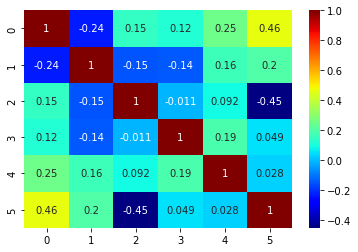

In [14]:
X2 = df2.iloc[:,0:6]
Y2 = df2.iloc[:,6]
cor2 = np.corrcoef(X2.transpose())
X2.head(),sns.heatmap(cor2, cmap = "jet", annot = True)

In [15]:
m2 = ols('LC50 ~ CIC0 + SM1DZ + GATS1I + NDSCH + NDSSC', df2).fit()
at2 = anova_lm(m2)
print(m2.summary(),"\n\n ANOVA:\n\n",at2)

                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     191.2
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          7.87e-139
Time:                        23:23:49   Log-Likelihood:                -1300.8
No. Observations:                 908   AIC:                             2614.
Df Residuals:                     902   BIC:                             2642.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3056      0.194     11.903      0.0

***

First candidate to drop would be the `NDSSC` due to it's p value.

In [16]:
m2 = ols('LC50 ~ CIC0 + SM1DZ + GATS1I + NDSCH ', df2).fit()
at2 = anova_lm(m2)
print(m2.summary(),"\n\n ANOVA:\n\n",at2)

                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     239.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          5.85e-140
Time:                        23:23:49   Log-Likelihood:                -1301.0
No. Observations:                 908   AIC:                             2612.
Df Residuals:                     903   BIC:                             2636.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3350      0.188     12.416      0.0

***
Still not very good. Let's try to remove intercept term since all variables have the same p value.

In [17]:
m2 = ols('LC50 ~ CIC0 + SM1DZ + GATS1I + NDSCH - 1', df2).fit()
at2 = anova_lm(m2)
print(m2.summary(),"\n\n ANOVA:\n\n",at2)

                                 OLS Regression Results                                
Dep. Variable:                   LC50   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              3273.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                        0.00
Time:                        23:23:49   Log-Likelihood:                         -1372.5
No. Observations:                 908   AIC:                                      2753.
Df Residuals:                     904   BIC:                                      2772.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

***
Great! Since p values are not a indicator anymore, when I try to remove any predictor, $R^2$ decreases significantly. So let's call it and build the model with these predictors. Checking the heatmap of the predictors again;

,CIC0,SM1DZ,GATS1I,NDSCH
0,3.260,0.829,1.676,0
1,2.189,0.580,0.863,0
2,2.125,0.638,0.831,0
3,3.027,0.331,1.472,1
4,2.094,0.827,0.860,0
...,...,...,...,...
903,2.801,0.728,2.226,0
904,3.652,0.872,0.867,2
905,3.763,0.916,0.878,0
906,2.831,1.393,1.077,0


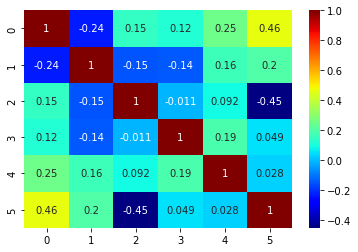

In [18]:
X2.head(),sns.heatmap(cor2, cmap = "jet", annot = True)
X2.iloc[:,0:4]

We can see that the row and column of the `NDSSC` was problematic. In any other element the max value is $0.25$, but when `NDSSC` is in business, values go up. So, our model is sensible in both terms.

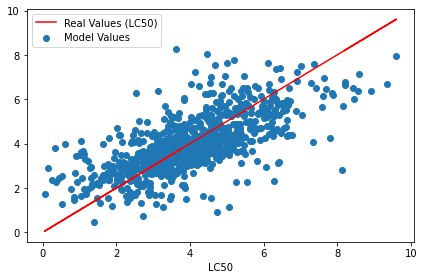

In [19]:
X2new = X2.iloc[:,0:4]
pred2 = m2.predict(X2new)
yreal2 = Y2
plt.plot(yreal2,yreal2, c="red",label="Real Values (LC50)")
plt.scatter(yreal2,pred2,label = "Model Values")
plt.legend()
plt.xlabel("LC50")
plt.tight_layout()
plt.show()

It seems relatively good. Since the data is clustered, linear regression might not be the perfect analyzing tool.

***
# Question 3

Develop a sensible regression model for the following [dataset](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized):


In [20]:
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None)
#interconnections

There are 16 possible response variables. You may choose any one of these as the response variable.

* murders: number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* murdPerPop: number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* rapes: number of rapes in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* rapesPerPop: number of rapes per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* robberies: number of robberies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* robbbPerPop: number of robberies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* assaults: number of assaults in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* assaultPerPop: number of assaults per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* burglaries: number of burglaries in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* burglPerPop: number of burglaries per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* larcenies: number of larcenies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* larcPerPop: number of larcenies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* autoTheft: number of auto thefts in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* autoTheftPerPop: number of auto thefts per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* arsons: number of arsons in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* arsonsPerPop: number of arsons per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)
* nonViolPerPop: total number of non-violent crimes per 100K popuation (numeric - decimal) potential GOAL attribute (to be predicted)


***
# Solution 3

## Data Preparation

I will start with some data preparation;

- Headers were missing. I took them as a .txt from data source, separated the column names and put them into columns as a dictionary (Since the homework format is a single .ipynb, I pasted the column names as a string here).
- Some values were in the form of question mark. I replaced them with np.nan.
- Since I don't want to deal with nan's, I droped any columns or rows that has nan. Missed some data but we also get rid of a lot of errors (In fact, these kinds of issues are generally solved by replacing the problematic element with the column median, but I will not use it for now).

In [21]:
#filename = 'headers_hw2_q3.txt'
#file = open(filename, 'rt')
#lines = file.readlines()
#file.close()
#colnames=[]
#for i in lines:
#    temp = i.split()
#    colnames.append(temp[1])
#colnames

colnames=['communityname',
 'State',
 'countyCode',
 'communityCode',
 'fold',
 'pop',
 'perHoush',
 'pctBlack',
 'pctWhite',
 'pctAsian',
 'pctHisp',
 'pct12-21',
 'pct12-29',
 'pct16-24',
 'pct65up',
 'persUrban',
 'pctUrban',
 'medIncome',
 'pctWwage',
 'pctWfarm',
 'pctWdiv',
 'pctWsocsec',
 'pctPubAsst',
 'pctRetire',
 'medFamIncome',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'NAperCap',
 'asianPerCap',
 'otherPerCap',
 'hispPerCap',
 'persPoverty',
 'pctPoverty',
 'pctLowEdu',
 'pctNotHSgrad',
 'pctCollGrad',
 'pctUnemploy',
 'pctEmploy',
 'pctEmployMfg',
 'pctEmployProfServ',
 'pctOccupManu',
 'pctOccupMgmt',
 'pctMaleDivorc',
 'pctMaleNevMar',
 'pctFemDivorc',
 'pctAllDivorc',
 'persPerFam',
 'pct2Par',
 'pctKids2Par',
 'pctKids-4w2Par',
 'pct12-17w2Par',
 'pctWorkMom-6',
 'pctWorkMom-18',
 'kidsBornNevrMarr',
 'pctKidsBornNevrMarr',
 'numForeignBorn',
 'pctFgnImmig-3',
 'pctFgnImmig-5',
 'pctFgnImmig-8',
 'pctFgnImmig-10',
 'pctImmig-3',
 'pctImmig-5',
 'pctImmig-8',
 'pctImmig-10',
 'pctSpeakOnlyEng',
 'pctNotSpeakEng',
 'pctLargHousFam',
 'pctLargHous',
 'persPerOccupHous',
 'persPerOwnOccup',
 'persPerRenterOccup',
 'pctPersOwnOccup',
 'pctPopDenseHous',
 'pctSmallHousUnits',
 'medNumBedrm',
 'houseVacant',
 'pctHousOccup',
 'pctHousOwnerOccup',
 'pctVacantBoarded',
 'pctVacant6up',
 'medYrHousBuilt',
 'pctHousWOphone',
 'pctHousWOplumb',
 'ownHousLowQ',
 'ownHousMed',
 'ownHousUperQ',
 'ownHousQrange',
 'rentLowQ',
 'rentMed',
 'rentUpperQ',
 'rentQrange',
 'medGrossRent',
 'medRentpctHousInc',
 'medOwnCostpct',
 'medOwnCostPctWO',
 'persEmergShelt',
 'persHomeless',
 'pctForeignBorn',
 'pctBornStateResid',
 'pctSameHouse-5',
 'pctSameCounty-5',
 'pctSameState-5',
 'numPolice',
 'policePerPop',
 'policeField',
 'policeFieldPerPop',
 'policeCalls',
 'policCallPerPop',
 'policCallPerOffic',
 'policePerPop2',
 'racialMatch',
 'pctPolicWhite',
 'pctPolicBlack',
 'pctPolicHisp',
 'pctPolicAsian',
 'pctPolicMinority',
 'officDrugUnits',
 'numDiffDrugsSeiz',
 'policAveOT',
 'landArea',
 'popDensity',
 'pctUsePubTrans',
 'policCarsAvail',
 'policOperBudget',
 'pctPolicPatrol',
 'gangUnit',
 'pctOfficDrugUnit',
 'policBudgetPerPop',
 'murders',
 'murdPerPop',
 'rapes',
 'rapesPerPop',
 'robberies',
 'robbbPerPop',
 'assaults',
 'assaultPerPop',
 'burglaries',
 'burglPerPop',
 'larcenies',
 'larcPerPop',
 'autoTheft',
 'autoTheftPerPop',
 'arsons',
 'arsonsPerPop',
 'violentPerPop',
 'nonViolPerPop']

col_index = [i for i in range(len(colnames))]
col_dict = dict(zip(col_index,colnames))
df3 = pd.DataFrame(interconnections)
df3.rename(col_dict, axis=1, inplace = True)
df3 = df3.replace(to_replace = '?', value = np.nan)
df3 = df3.dropna()
df3

,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
54,Toledocity,OH,95,77000,1,332943,2.54,19.70,76.96,1.05,...,5502,1698.29,15251,4707.51,4517,1394.26,357,110.19,984.96,7910.25
55,Philadelphiacity,PA,101,60000,1,1585577,2.63,39.86,53.52,2.74,...,15117,988.14,39181,2561.1,23785,1554.73,2282,149.17,1279.6,5253.14
58,Lynchburgcity,VA,680,47672,1,66049,2.63,26.41,72.45,0.76,...,560,833.83,2316,3448.48,184,273.97,50,74.45,753.42,4630.73
99,NewHaventown,CT,9,52070,1,130474,2.66,36.14,53.85,2.41,...,3417,2856.93,7719,6453.8,1873,1566,134,112.04,2127.02,10988.76
122,Springfieldcity,OH,23,74118,1,70487,2.59,17.38,81.61,0.51,...,963,1362.13,4048,5725.76,457,646.41,6,8.49,1497.92,7742.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,WestAlliscity,WI,79,85300,10,63221,2.36,0.30,98.23,0.63,...,423,684.99,2059,3334.25,265,429.13,42,68.01,236.43,4516.38
2097,VirginiaBeachcity,VA,810,82000,10,393069,2.90,13.91,80.50,4.33,...,3261,748.01,14812,3397.57,1195,274.11,200,45.88,286.27,4465.56
2116,CherryHilltownship,NJ,7,12280,10,69348,2.83,3.23,89.79,6.14,...,612,846.79,2158,2985.9,424,586.66,5,6.92,208.93,4426.27
2200,FallRivercity,MA,5,23000,10,92703,2.49,1.03,97.17,1.33,...,334,371.47,707,786.32,419,466.01,0,0,640.62,1623.79


We can drop the non-predictive features of the data which indicates the locaation and city information. Also, last $18$ columns are target variables so I also remove them to only have predictors.

In [22]:
X3 = df3.iloc[:,5:-18]
X3.head()

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop
54,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,...,89.3,83.5,3988.5,3.00,222,41348280,80.67,5,4.39,127629.2
55,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,...,39.9,140.0,11326.0,29.31,822,287578496,99.94,0,4.19,187978.5
58,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,...,38.7,51.2,1290.5,3.33,62,5585480,89.13,0,5.80,83166.8
99,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,...,167.4,19.5,6679.9,9.54,100,17939552,89.74,5,3.08,149991.2
122,70487,2.59,17.38,81.61,0.51,0.65,16.05,28.26,15.37,13.59,...,52.8,20.2,3485.1,1.06,45,5653511,93.07,0,5.94,79967.1


Now we will have a giant correlation matrix which indicates the dependencies inside the data.

In [23]:
cor3 = X3.corr()
cor3

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
pop,1.000000,-0.039787,0.374517,-0.320978,-0.061228,-0.117545,0.128942,0.123253,0.107723,-0.121647,...,0.711432,-0.199691,0.135496,-0.070055,0.090474,0.053943,0.515705,0.043624,0.270781,-0.120342
perHoush,-0.039787,1.000000,0.223473,-0.362731,0.149529,0.401573,0.497772,0.185586,0.228599,-0.438756,...,0.166244,0.227644,-0.280910,0.038487,-0.037169,-0.031885,0.081280,0.103967,-0.088788,-0.054021
pctBlack,0.374517,0.223473,1.000000,-0.950000,-0.239750,0.048385,0.302031,0.227132,0.192574,-0.340294,...,0.339192,-0.133122,-0.071086,-0.201722,0.044780,0.028862,0.141321,0.197600,0.326610,-0.061036
pctWhite,-0.320978,-0.362731,-0.950000,1.000000,0.094868,-0.307899,-0.355315,-0.303406,-0.237681,0.431876,...,-0.352026,-0.071928,0.208047,0.229065,-0.016765,0.040225,-0.054544,-0.354675,-0.407229,0.027268
pctAsian,-0.061228,0.149529,-0.239750,0.094868,1.000000,0.067495,-0.039603,0.128898,0.083175,-0.249268,...,0.017428,0.381079,-0.335051,-0.041866,-0.370965,-0.353672,-0.097214,0.114323,0.296970,-0.076624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pctSameState-5,0.053943,-0.031885,0.028862,0.040225,-0.353672,-0.128375,-0.147634,-0.440552,-0.337456,0.545752,...,0.083630,-0.244896,0.765225,0.624831,0.846827,1.000000,-0.087802,-0.145884,-0.229855,-0.117713
landArea,0.515705,0.081280,0.141321,-0.054544,-0.097214,-0.248885,0.103874,0.058706,0.022424,-0.282453,...,0.174985,-0.334840,0.039532,-0.252936,-0.217158,-0.087802,1.000000,-0.261612,-0.151661,-0.061591
popDensity,0.043624,0.103967,0.197600,-0.354675,0.114323,0.740290,0.069195,0.251532,0.130543,-0.212810,...,0.161461,0.715785,-0.363568,-0.023186,0.009649,-0.145884,-0.261612,1.000000,0.658572,-0.010464
pctUsePubTrans,0.270781,-0.088788,0.326610,-0.407229,0.296970,0.328282,-0.045147,0.213024,0.104255,-0.201132,...,0.359760,0.431706,-0.360360,0.039417,-0.126519,-0.229855,-0.151661,0.658572,1.000000,-0.147086


I will select the attribute **Number of Foreign Born**, because I want to see if there is a connection. I think there might be a connection between the people who does not live in a place which he spent her/his childhood or most of her/his life and crime. If someone do not feel like she/he belongs to the present surroundings and community, there is a possibility of discomfort and at worst, crime. Now I will select some other predictors to go with **ForeignBorn** and then I will select a crime from the responses to search for a connection.

In [24]:
cor3['pctForeignBorn']

pop                -0.199691
perHoush            0.227644
pctBlack           -0.133122
pctWhite           -0.071928
pctAsian            0.381079
                      ...   
pctSameState-5     -0.244896
landArea           -0.334840
popDensity          0.715785
pctUsePubTrans      0.431706
pctOfficDrugUnit    0.048232
Name: pctForeignBorn, Length: 101, dtype: float64

I will select the rows with correlation values between $-0.04$ and $0.04$ for relatively low linear dependence. The rows of the dataframe `predictors` will be the new independent variables.

In [25]:
temp = cor3[cor3['pctForeignBorn'] < 0.04]
predictors = temp[temp['pctForeignBorn'] > -0.04]
predictors

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
pct16-24,0.107723,0.228599,0.192574,-0.237681,0.083175,0.090081,0.890236,0.930898,1.000000,-0.390021,...,0.047343,-0.010550,-0.044934,-0.648512,-0.471755,-0.337456,0.022424,0.130543,0.104255,0.034614
pctUrban,0.051951,-0.062052,0.100064,-0.117938,-0.032246,0.075439,0.096927,0.189163,0.145550,-0.043089,...,0.045364,-0.014511,0.193794,-0.058603,0.083748,0.128881,-0.215140,0.143630,-0.000334,0.131836
pctWfarm,-0.143853,-0.067096,-0.310821,0.321229,0.117617,-0.132153,-0.049931,0.017809,0.037813,-0.151718,...,-0.140982,-0.003037,-0.290899,-0.146825,-0.348645,-0.366781,0.047613,-0.162533,-0.031478,-0.149544
NAperCap,-0.100022,0.245363,0.123230,-0.159104,0.039016,0.080447,-0.022984,-0.101478,-0.090538,-0.057711,...,-0.016908,0.021763,-0.126717,0.152251,-0.005941,0.002084,-0.024067,-0.001721,0.041106,-0.074509
pctOccupMgmt,-0.084260,-0.312341,-0.270931,0.332948,0.388658,-0.380395,-0.299717,-0.136098,-0.090153,0.013536,...,-0.154236,-0.029767,-0.353167,-0.009172,-0.461592,-0.438491,0.014374,-0.237119,0.237948,-0.175030
pct12-17w2Par,-0.334627,-0.078350,-0.752952,0.803050,0.228944,-0.316169,-0.477527,-0.495078,-0.439882,0.317834,...,-0.297796,0.004861,0.009364,0.413908,-0.050226,0.010993,0.037791,-0.381464,-0.375220,0.019241
pctKidsBornNevrMarr,0.342371,0.242424,0.832272,-0.901758,-0.206995,0.355733,0.442579,0.426647,0.353488,-0.382500,...,0.368084,0.015683,-0.074940,-0.321899,0.091162,0.008568,-0.009505,0.367393,0.404013,-0.035996
persHomeless,0.711432,0.166244,0.339192,-0.352026,0.017428,0.078145,0.121147,0.065945,0.047343,-0.102233,...,1.000000,0.014860,0.025998,0.097255,0.155193,0.083630,0.174985,0.161461,0.359760,-0.142936


The lucky predictors are;

- pctTeen $\to$ agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)
- pctUrban: percentage of people living in areas classified as urban (numeric - decimal) 
- pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal) 
- indianPerCap: per capita income for native americans (numeric - decimal) 
- PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal) 
- TwoParents $\to$ PctTeen2Par: percent of kids age 12-17 in two parent households (numeric - decimal)
- PctKidsBornNeverMar: percentage of kids born to never married (numeric - decimal) 
- persHomeless $\to$ NumStreet: number of homeless people counted in the street (numeric - expected to be integer) 

Now I will filter down a new dataframe named final columns (`fc`) to build the model. Also I will be using the response `assaults` and put it inside the same data frame

In [61]:
fc = df3[['pct16-24','pctUrban','pctWfarm','NAperCap','pctOccupMgmt','pct12-17w2Par','pctKidsBornNevrMarr','persHomeless','pctForeignBorn','assaults']]
fc.rename(columns = {"pct16-24" : "pctTeen", "pct12-17w2Par" : "pctTwoParents"})
fc["assaults"] = pd.to_numeric(fc["assaults"])
fc

/var/folders/br/mv72mvfs2mxc9vk8h65t352c0000gn/T/ipykernel_66206/1847128799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc["assaults"] = pd.to_numeric(fc["assaults"])


,pct16-24,pctUrban,pctWfarm,NAperCap,pctOccupMgmt,pct12-17w2Par,pctKidsBornNevrMarr,persHomeless,pctForeignBorn,assaults
54,14.52,100.00,0.36,9450,22.88,65.53,6.00,12,2.78,1195
55,14.12,100.00,0.35,10146,24.81,56.66,11.53,1069,6.61,6821
58,18.19,100.00,0.63,12833,27.39,69.80,5.88,0,1.68,351
99,19.17,100.00,0.47,7750,30.00,44.87,15.07,16,8.15,1154
122,15.37,100.00,0.31,5418,21.14,60.85,5.00,8,1.09,786
...,...,...,...,...,...,...,...,...,...,...
2086,10.88,100.00,0.31,8196,20.58,77.01,1.63,0,2.82,58
2097,15.46,99.10,0.50,12323,30.35,81.03,2.35,0,5.22,414
2116,11.04,100.00,0.60,13965,43.99,83.94,0.61,0,9.48,77
2200,13.93,99.75,0.24,10843,15.82,75.14,3.25,1,20.72,510


Now we can create the model using `ols` function (`pctTeen` and `pctTwoParents` predictors were removed due to inconsistent results and errors with `.ols`).

In [40]:
m3 = ols('assaults ~ pctUrban + pctWfarm + NAperCap + pctOccupMgmt + pctKidsBornNevrMarr + persHomeless + pctForeignBorn', fc).fit()
at3 = anova_lm(m3)
print(m3.summary(),"\n\n ANOVA:\n\n",at3)

                            OLS Regression Results                            
Dep. Variable:               assaults   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     20.92
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.82e-17
Time:                        23:33:02   Log-Likelihood:                -913.74
No. Observations:                 111   AIC:                             1843.
Df Residuals:                     103   BIC:                             1865.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2974.4113   6

***
Let's start by removing the `Intercept`.

In [41]:
m3 = ols('assaults ~ pctUrban + pctWfarm + NAperCap + pctOccupMgmt + pctKidsBornNevrMarr + persHomeless + pctForeignBorn -1 ', fc).fit()
at3 = anova_lm(m3)
print(m3.summary(),"\n\n ANOVA:\n\n",at3)

                                 OLS Regression Results                                
Dep. Variable:               assaults   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              30.56
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.41e-22
Time:                        23:34:14   Log-Likelihood:                         -913.85
No. Observations:                 111   AIC:                                      1842.
Df Residuals:                     104   BIC:                                      1861.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

***
Slightly better $R^2$ value! Let's go on with `pctUrban`.

In [50]:
m3 = ols('assaults ~ pctWfarm + NAperCap + pctOccupMgmt + pctKidsBornNevrMarr + persHomeless + pctForeignBorn -1 ', fc).fit()
at3 = anova_lm(m3)
print(m3.summary(),"\n\n ANOVA:\n\n",at3)

                                 OLS Regression Results                                
Dep. Variable:               assaults   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.652
Method:                 Least Squares   F-statistic:                              35.71
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    2.96e-23
Time:                        23:38:15   Log-Likelihood:                         -914.15
No. Observations:                 111   AIC:                                      1840.
Df Residuals:                     105   BIC:                                      1857.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

Whatever predictor I remove after the intercept decreases the $R^2$ values so I will stop and finalize the model. This is not a good model, since it can predict the data only at a rate $R^2 = 0.673$. So I will use all predictors also including `pctUrban`. If we plot the original data and the predictions, we have;

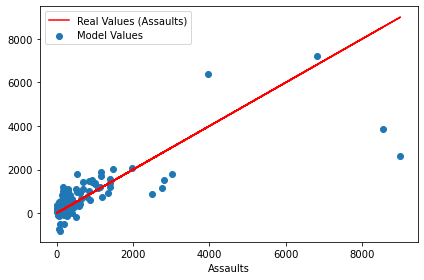

In [64]:
X3new = fc.iloc[:,0:9]
pred3 = m3.predict(X3new)
yreal3 = fc["assaults"]
plt.plot(yreal3,yreal3, c="red",label="Real Values (Assaults)")
plt.scatter(yreal3,pred3,label = "Model Values")
plt.legend()
plt.xlabel("Assaults")
plt.tight_layout()
plt.show()

Not a succesfull model!

# References

## General

- [Colormap options for correlation matrices](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Removing intercept term in `smf.ols` function](https://stackoverflow.com/questions/54257216/how-to-set-intercept-to-0-with-statsmodel-for-multiple-linear-regression)
- [Practical guide to linear regression with Python](https://realpython.com/linear-regression-in-python/)
- [Linear Regression and ANOVA article from R cookbook](https://rc2e.com/linearregressionandanova)
- [Understanding the Regression Summary](https://rc2e.com/linearregressionandanova#recipe-id240)
- [Python for Data 26: ANOVA](https://www.kaggle.com/code/hamelg/python-for-data-26-anova/notebook)
- [ANOVA Tables, section 16.3.1](https://www.middleprofessor.com/files/applied-biostatistics_bookdown/_book/anova-tables.html)

## Problem 1

- [Description of the first problem's dataset](https://www.statsmodels.org/dev/datasets/generated/copper.html)

## Problem 2

- [Simon Wenkel's Analysis on Dataset](https://www.simonwenkel.com/2019/09/30/revisitingML-qsar-fish-toxicity.html)
- [Original research that data was taken from](https://www.researchgate.net/publication/273700321_A_similarity-based_QSAR_model_for_predicting_acute_toxicity_towards_the_fathead_minnow_Pimephales_promelas)
- [MLR & KNN Analysis from Github](https://github.com/trizkynoviandy/qsar-fish-toxicity)

## Problem 3

- [Analysis from a Kaggle user](https://www.kaggle.com/code/kkanda/analyzing-uci-crime-and-communities-dataset/notebook)




